In [50]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=1)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import os
import sys
root_dir = './'
src_dir = os.path.join(root_dir, 'code')
sys.path = [src_dir] + sys.path

In [52]:
from eden_rna.io.rfam import get_rfam_sequence
header, seq = get_rfam_sequence(rfam_id='RF00005', seq_id=6)
print header
print seq

AB031211.1/7799-7884
GCCGGGGUGGUGGAAUUGGCAGACACACAGGACUUAAAAUCCUGCGGUAGGUGACUACCGUGCCGGUUCAAGUCCGGCCCUCGGCA


In [53]:
from RaSE import StructuralStabilityEstimator
rase = StructuralStabilityEstimator(seq, k=6, avg_bp_prob_cutoff=0.1)

In [54]:
print rase.stability_score(0,'A')
print rase.stability_score(12,'U')

0.94686786466
0.522165109706


In [55]:
print rase.stability_score(0,'A', importance_semi_window=5)
print rase.stability_score(12,'U', importance_semi_window=5)

0.574633611575
0.234641032702


In [56]:
from RaSE import StructuralStabilityEstimator
rase = StructuralStabilityEstimator(seq, k=6, avg_bp_prob_cutoff=0.1, importance_window_begin=2, importance_window_end=12)

In [57]:
%%time
rase.compute_stability_scores()

CPU times: user 7.07 s, sys: 3.18 s, total: 10.3 s
Wall time: 54.2 s


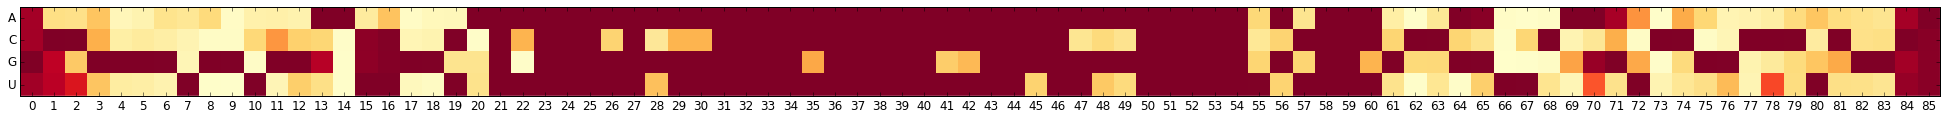

In [58]:
rase.plot_stability_matrix()

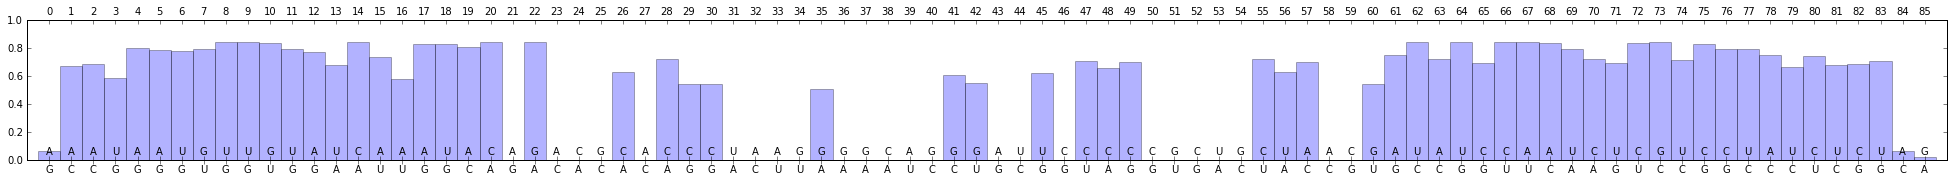

In [59]:
rase.plot_instability()

In [60]:
print rase.mutations

AAAUAAUGUUGUAUCAAAUACAGACGCACCCUAAGGGGCAGGGAUUCCCCCGCUGCUAACGAUAUCCAAUCUCGUCCUAUCUCUAG


In [61]:
for line in rase.output(): print line

            GCCGGGGUGGUGGAAUUGGCAGACACACAGGACUUAAAAUCCUGCGGUAGGUGACUACCGUGCCGGUUCAAGUCCGGCCCUCGGCA
            ((((((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....)).)))).)))).
G 00 A 0.94 .(((((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....)).)))).))).. 
C 01 A 0.33 ((.(((.(((..(((((((((......(((((.......)))))((((((....)))))))))))))))....))).))))).... 
C 02 A 0.31 ((((((.(((..(((((((((......(((((.......)))))((((((....)))))))))))))))....))).))))..)). 
G 03 U 0.41 (((.((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....)).))))..))). 
G 04 A 0.20 (((((((.(.(((((((((((......(((((.......)))))((((((....))))))))))))).....)))).)))))))). 
G 05 A 0.22 ((((((......(((((((((......(((((.......)))))((((((....)))))))))))))))...))))))........ 
G 06 U 0.22 ((((((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....)))))))..))). 
U 07 G 0.20 ((((((((((..(((((((((......(((((.......)))))((((((....)))))))))))))))....))..)))))))). 
G 

In [62]:
print rase.scores

[0.9359747655713585, 0.32844646715372278, 0.31216122017979425, 0.41495305643189745, 0.19811380498732961, 0.21637090192801772, 0.21766349606037144, 0.20419599792959348, 0.15897569612907994, 0.1531306501456603, 0.16509016880686153, 0.20487525480842475, 0.22458852622810402, 0.31984836547005741, 0.15744929191097226, 0.25957363260921668, 0.42376391533220303, 0.1686508511385672, 0.17229971564834193, 0.1937310306449771, 0.15850290873763972, 0.99999452708169423, 0.15834811903315374, 0.99999930031340412, 0.99998785664685785, 0.99999935193603773, 0.37333702404567942, 0.99998276908459405, 0.27798029808593039, 0.45925837817139142, 0.45833230383323004, 0.99995818990734908, 0.99999999957710628, 0.99999999957710628, 0.99999997162906251, 0.49378159921458831, 0.9999973615043849, 0.99999999936114914, 0.99999995803197117, 0.99999600390580168, 0.99995272020824455, 0.39311486115693328, 0.44715650751236646, 0.99997380024265492, 0.99963592394293788, 0.37646002056646255, 0.99955171326116576, 0.291775895026110

In [63]:
print rase.matrix

[[ 0.93597477  0.32844647  0.31216122  0.41933717  0.1981138   0.2163709
   0.30786382  0.28361984  0.35047884  0.16944586  0.23139666  0.23725905
   0.22458853  1.          1.          0.25957363  0.42376392  0.16865085
   0.19189781  0.19373103  1.          0.99999453  1.          0.9999993
   1.          0.99999938  1.          0.99998277  1.          0.99989432
   0.9999726   1.          1.          1.          1.          1.          1.
   1.          1.          0.999996    0.99999838  0.99979987  0.99994663
   0.9999738   0.99994024  0.99995222  0.99998841  0.99999882  1.
   0.99999291  1.          1.          1.          1.          0.99995104
   0.35748897  1.          0.29822642  0.99999872  0.99999723  0.9999618
   0.24612204  0.15854533  0.28008263  0.9936055   0.98283567  0.16834052
   0.15893413  0.16338972  1.          1.          0.93009341  0.55894503
   0.15817117  0.48667174  0.36716528  0.21258943  0.22070181  0.24680959
   0.34104495  0.41742977  0.33684001  0.3138

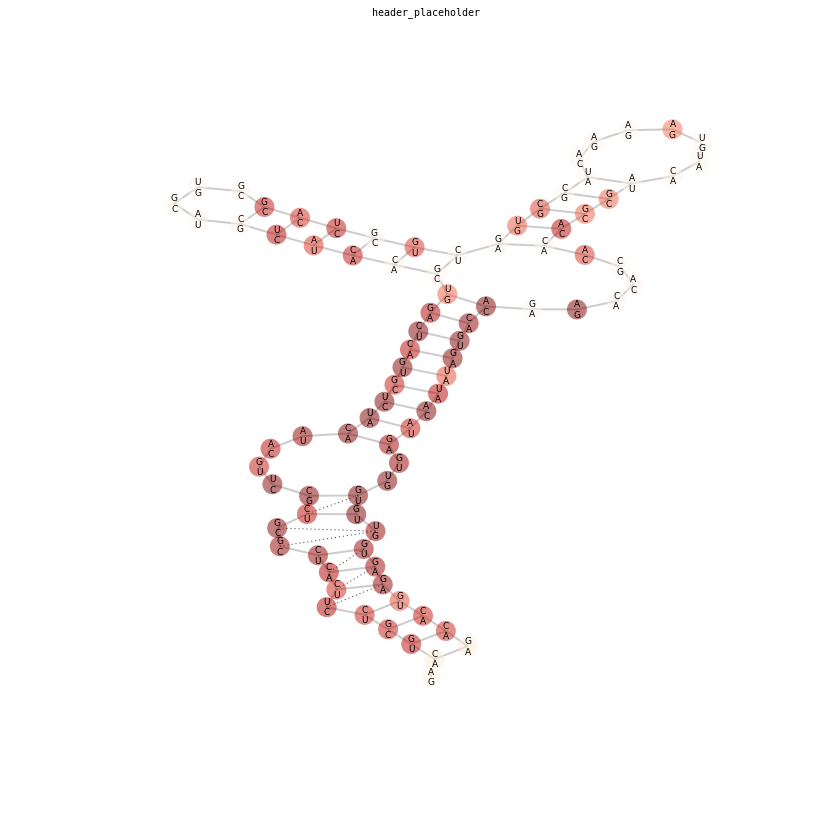

In [ ]:
rase.draw()

In [ ]:
rase.draw_all()

---